In [1]:
#0 = without heart disease, 1 = with heart disease.
# Importing Necessary Libraries

#for Data Analysis
import numpy as np
import pandas as pd

#for Data Visualization
import seaborn as sns
import matplotlib.pyplot as plt

#for Data Preprocessing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder

# ML Classifier Libraries
from sklearn.linear_model import SGDClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
# !pip install xgboost
from xgboost import XGBClassifier
from sklearn.svm import LinearSVC, SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier

# Evaluation Metrics
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.metrics import confusion_matrix

import warnings
warnings.filterwarnings("ignore")

## The features include
Age - in years.

Sex - (M=male, F= female).

ChestPainType - (TA:typical angina. ATA: atypical angina, NAP:non-angina, ASY: asymptomatic).

RestingBP- Resting Blood Pressure.

Cholesterol- Serum Cholesterol in mg/dl.

FastingBS - (Fasting Blood Sugar > 120mg/dl)(1 =true, 0= false)'

RestingECG- Resting Electrocardiographic Results

MaxHR - Maximum Heart Rate Achieved

ExerciseAngina - Exercise Induced Angina (Y = yes, N= no).

Oldpeak - ST depression induced by exercise relative to rest

ST_Slope- the slope of the peak exercise ST segment

HeartDisease - Have disease or not (1=yes, 0 = no)


In [2]:
# Loading the dataset
df = pd.read_csv("Heart Disease Predictions.csv")
df.head(2)

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1


In [3]:
# Data verification - confirming the data type, missing values, nos of rows and features etc
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5508 entries, 0 to 5507
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             5508 non-null   int64  
 1   Sex             5508 non-null   object 
 2   ChestPainType   5508 non-null   object 
 3   RestingBP       5508 non-null   int64  
 4   Cholesterol     5508 non-null   int64  
 5   FastingBS       5508 non-null   int64  
 6   RestingECG      5508 non-null   object 
 7   MaxHR           5508 non-null   int64  
 8   ExerciseAngina  5508 non-null   object 
 9   Oldpeak         5508 non-null   float64
 10  ST_Slope        5508 non-null   object 
 11  HeartDisease    5508 non-null   int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 516.5+ KB


The review shows there are no missing values in the dataset and all features are in the correct data types. This is further reconfirmed and represented in the chart below.

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64


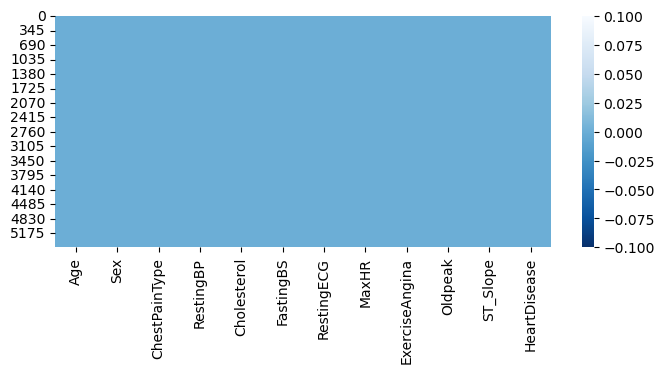

In [4]:
# Further Checking for missing data
print(df.isnull().sum())

# Visualizing the missing data
plt.figure(figsize=(8, 3))
sns.heatmap(df.isnull(), cbar=True, cmap="Blues_r");

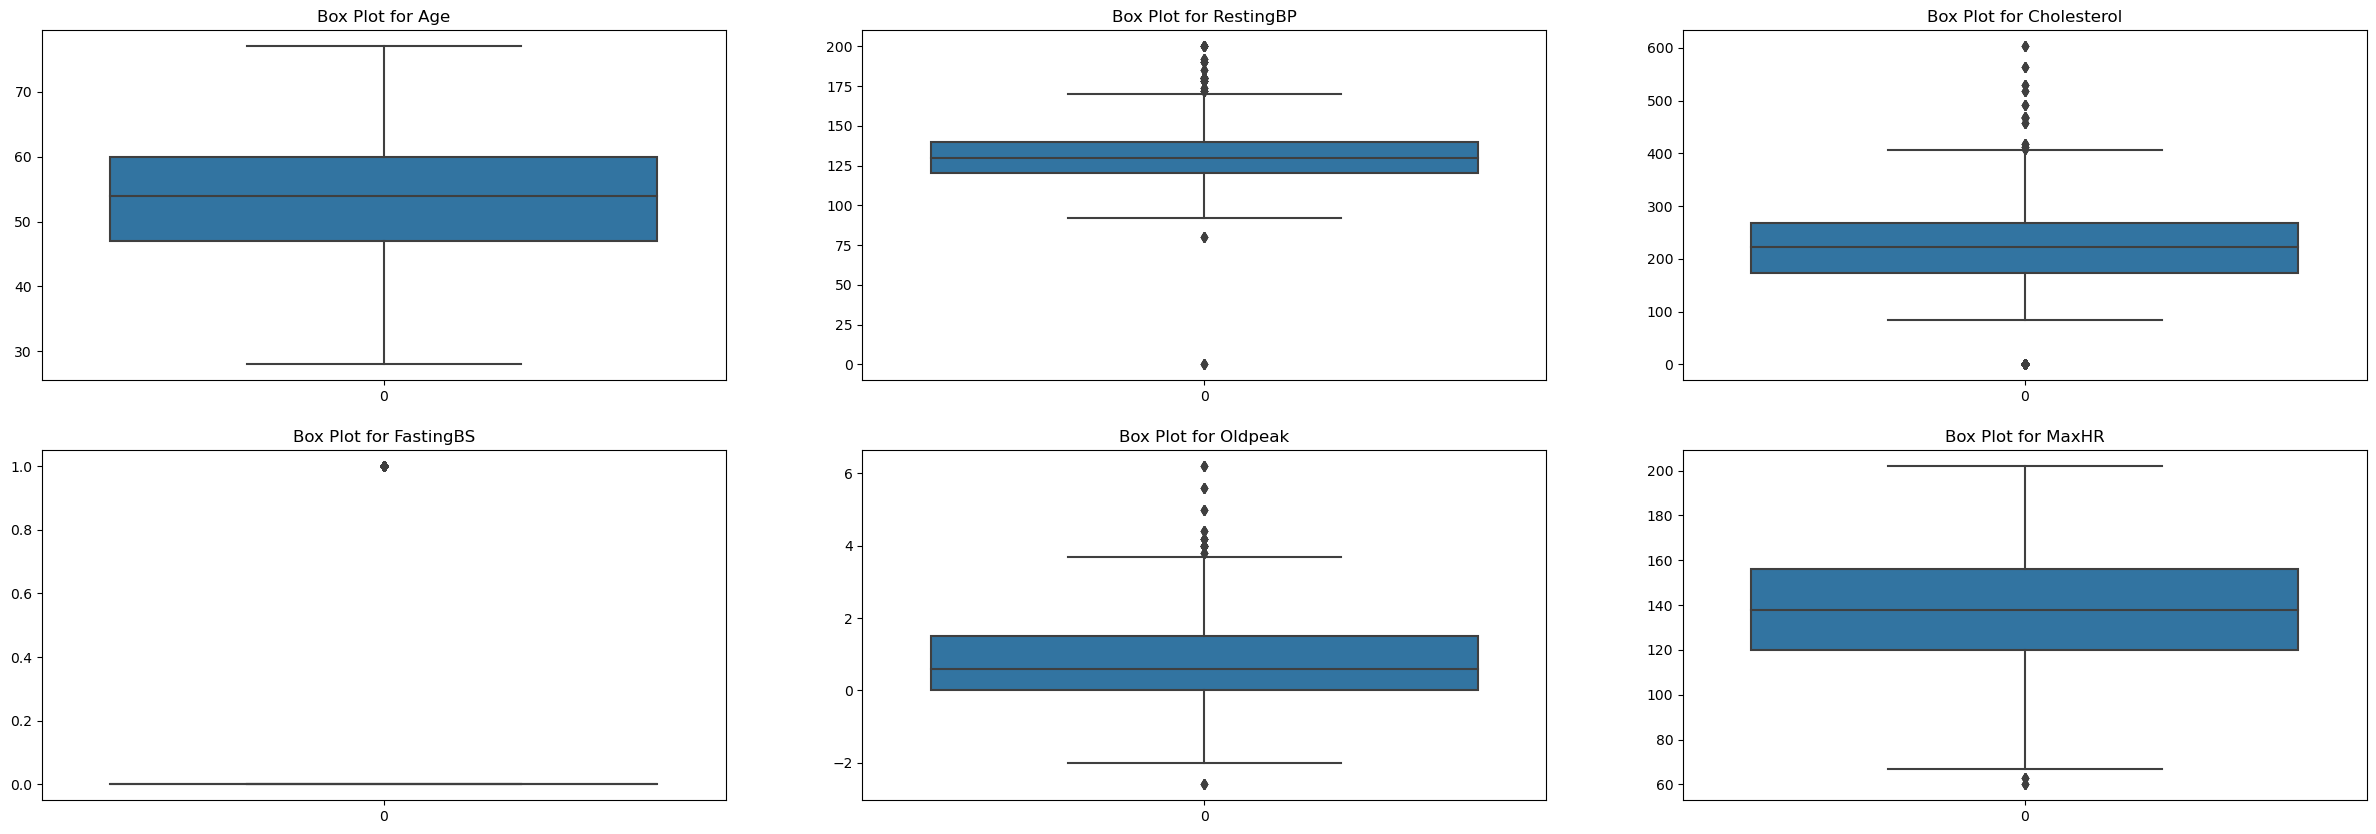

In [5]:
# Checking for Outliers using boxplots
fig,axs = plt.subplots(nrows=2, ncols=3, figsize=(30,10))
sns.boxplot(df["Age"], ax=axs[0,0])
axs[0,0].set_title("Box Plot for Age")

sns.boxplot(df["RestingBP"], ax=axs[0,1])
axs[0,1].set_title("Box Plot for RestingBP")

sns.boxplot(df["Cholesterol"], ax=axs[0,2])
axs[0,2].set_title("Box Plot for Cholesterol")

sns.boxplot(df["FastingBS"], ax=axs[1,0])
axs[1,0].set_title("Box Plot for FastingBS")

sns.boxplot(df["Oldpeak"], ax=axs[1,1])
axs[1,1].set_title("Box Plot for Oldpeak")

sns.boxplot(df["MaxHR"], ax=axs[1,2])
axs[1,2].set_title("Box Plot for MaxHR");

It is clear that we have some outliers as shown in the above chart eg Cholesterol, RestingBP etc and none in the Age column. 
The outliers will be handled later on.

In [6]:
# Analysing the different columns to understand the proportion of patient's features present in our data set.

print(df["Sex"].value_counts())

print(df["ChestPainType"].value_counts())

print(df["RestingECG"].value_counts())

print(df["ExerciseAngina"].value_counts())

print(df["ST_Slope"].value_counts());

Sex
M    4350
F    1158
Name: count, dtype: int64
ChestPainType
ASY    2976
NAP    1218
ATA    1038
TA      276
Name: count, dtype: int64
RestingECG
Normal    3312
LVH       1128
ST        1068
Name: count, dtype: int64
ExerciseAngina
N    3282
Y    2226
Name: count, dtype: int64
ST_Slope
Flat    2760
Up      2370
Down     378
Name: count, dtype: int64


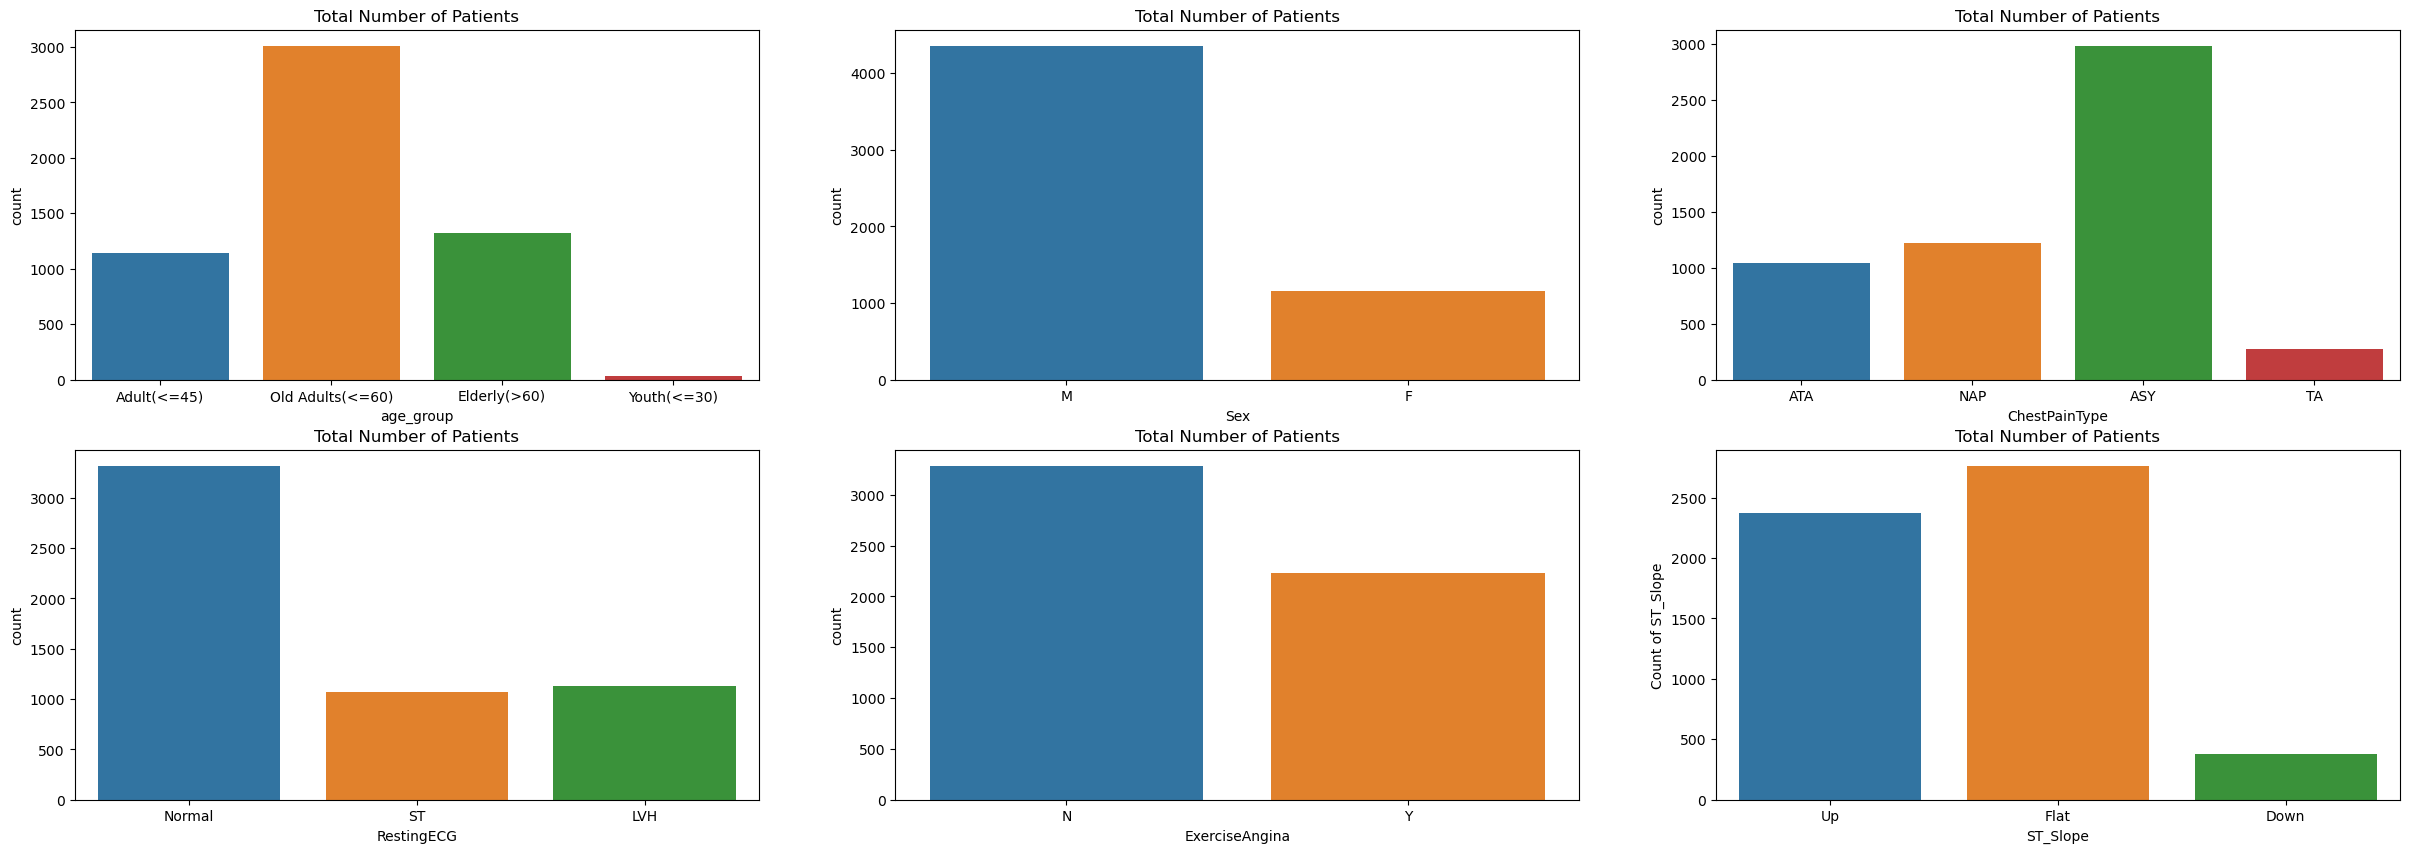

In [7]:
# Analysing and Visualizing the different columns to understand the proportion of patient's features present in our data set. 

# Grouping the ages in bracket and creating a function for it
def age_group(age):
    if age <=30:
        return "Youth(<=30)"
    elif age <=45:
        return "Adult(<=45)"
    elif age <=60:
        return "Old Adults(<=60)"
    else:
        return "Elderly(>60)"
    
df["age_group"] = df["Age"].apply(age_group)

fig,axs = plt.subplots(nrows=2, ncols=3, figsize=(30,10))

# Visualizing the age group
sns.countplot(x="age_group", data=df, ax=axs[0,0])
axs[0,0].set_title("Total Number of Patients")
plt.xlabel("Age Group")
plt.ylabel("Count of Age Group")

# Visualizing Gender
sns.countplot(x="Sex", data=df, ax=axs[0,1])
axs[0,1].set_title("Total Number of Patients")
plt.xlabel("Gender")
plt.ylabel("Count of Gender")

# Visualizing Chest Pain Type
sns.countplot(x="ChestPainType", data=df, ax=axs[0,2])
axs[0,2].set_title("Total Number of Patients")
plt.xlabel("ChestPainType")

# Visualizing RestingECG
sns.countplot(x="RestingECG", data=df, ax=axs[1,0])
axs[1,0].set_title("Total Number of Patients")
plt.xlabel("RestingECG")
plt.ylabel("Count of RestingECG")

# Visualizing ExerciseAngina
sns.countplot(x="ExerciseAngina", data=df, ax=axs[1,1])
axs[1,1].set_title("Total Number of Patients")
plt.xlabel("ExerciseAngina")
plt.ylabel("Count of ExerciseAngina")

# Visualizing ST_Slope
sns.countplot(x="ST_Slope", data=df, ax=axs[1,2])
axs[1,2].set_title("Total Number of Patients")
plt.xlabel("ST_Slope")
plt.ylabel("Count of ST_Slope");

We can see that majority of the Patients being considered in this data are within the Old Adult age bracket (46 and 60).

We also have more male patients than female, the ASY(asymptomatic) chest pain types were more represented in the patients in review. 

A lot of the patients have the Normal Resting ECG, with NO as the predominant Excerise Induced Angina, the ST_Slope- the slope of the peak exercise ST segment has UP and FLAT as being predominant.

In [8]:
df.head(2)

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease,age_group
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0,Adult(<=45)
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1,Old Adults(<=60)


HeartDisease1
yes    3048
no     2460
Name: count, dtype: int64


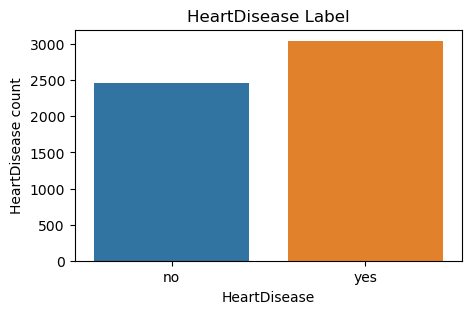

In [9]:
# Analysing the HeartDisease feature  to understand the proportion of patients with Heart disease.
# Grouping the Heart Disease column and creating a function for it

def HeartDisease(HD):
    if HD == 1:
        return "yes"
    else:
        return "no"
df["HeartDisease1"] = df["HeartDisease"].apply(HeartDisease)
print(df["HeartDisease1"].value_counts())

# Visualizing the HeartDisease feature
plt.figure(figsize=(5,3))
sns.countplot(x="HeartDisease1", data=df)
plt.xlabel("HeartDisease")
plt.ylabel("HeartDisease count")
plt.title("HeartDisease Label");

Our dataset has more patients with heart disease even though the margin is not an extremely large figure as noted in the count.

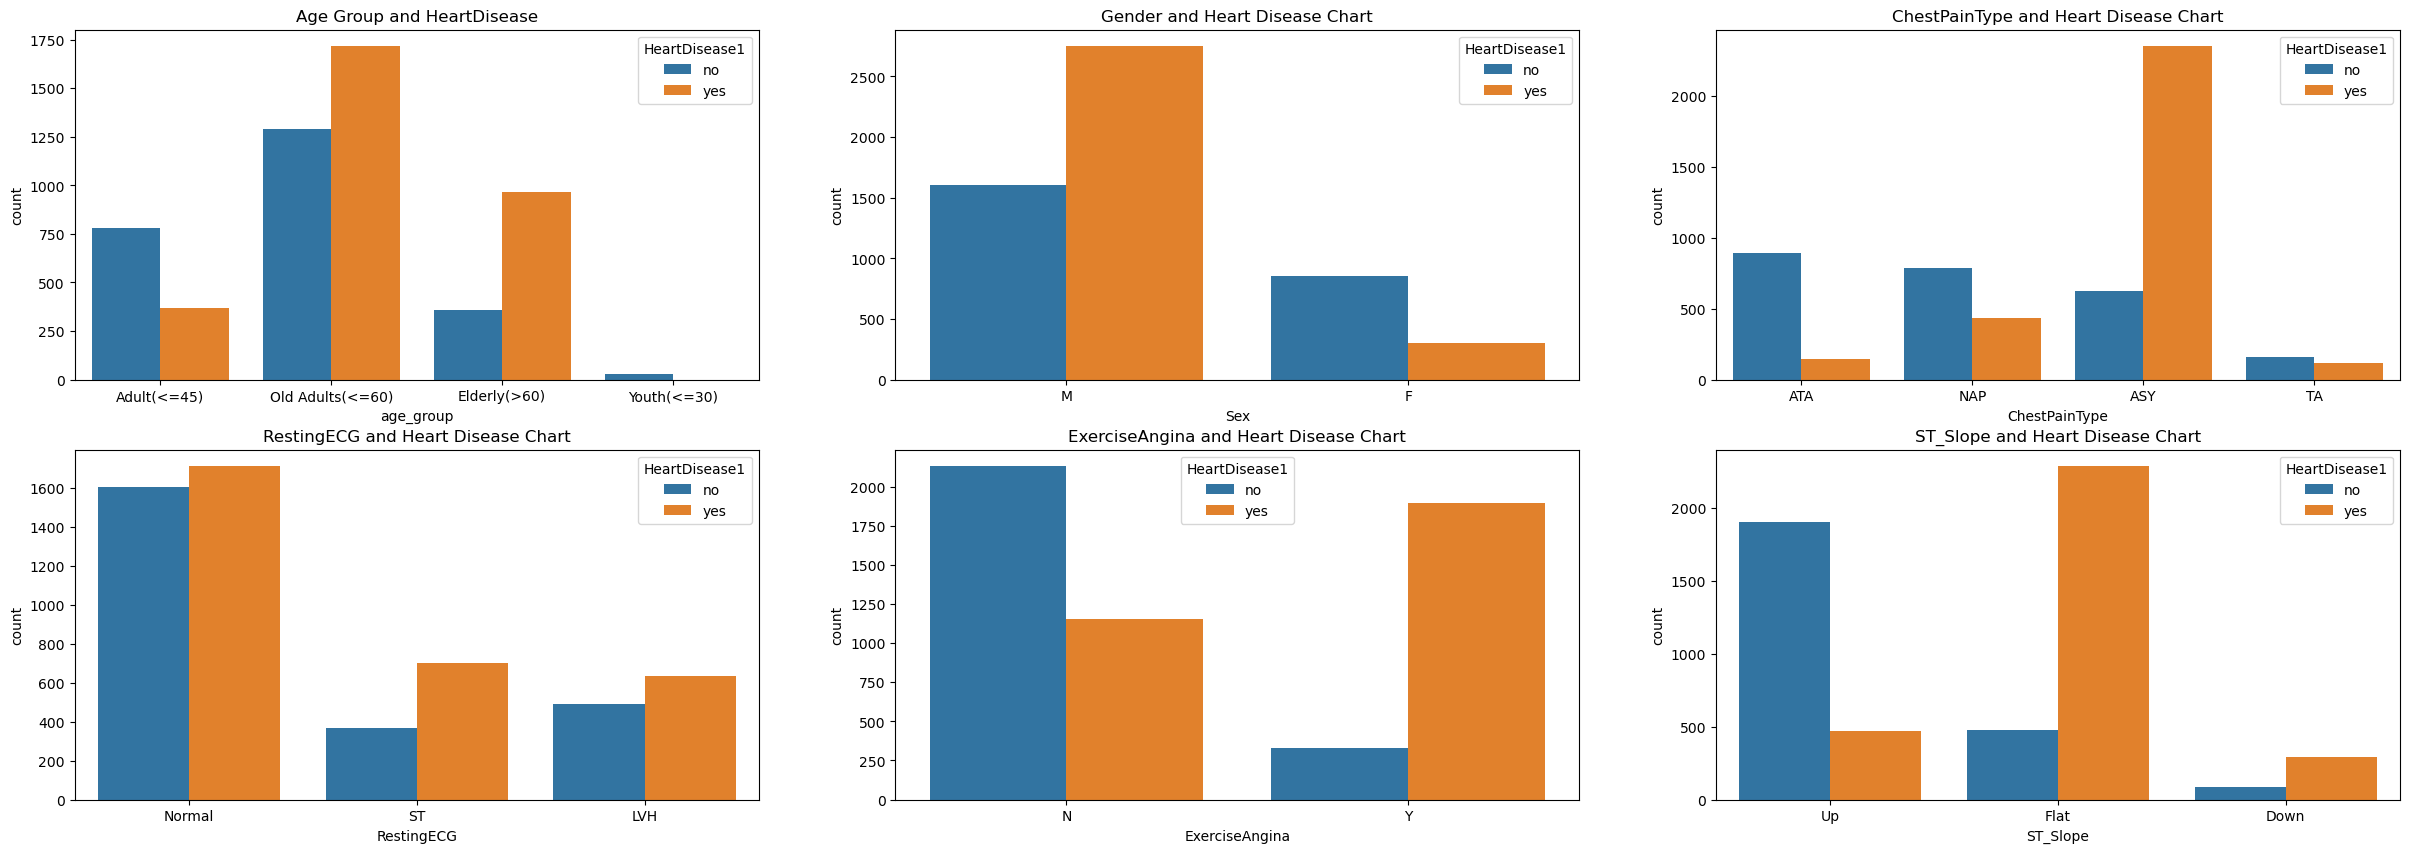

In [10]:
# Comparing the age group and target to derive insight into which age group has a heart disease
# Yes = Has heart disease, No = does not have heart disease

fig,axs = plt.subplots(nrows=2, ncols=3, figsize=(30,10))
sns.countplot(x="age_group", data=df, hue="HeartDisease1", ax=axs[0,0])
axs[0,0].set_title("Age Group and HeartDisease")
plt.xlabel("Age Group")
plt.ylabel("Count Of Heart Disease Patients")

sns.countplot(x="Sex", data=df, hue="HeartDisease1", ax=axs[0,1])
axs[0,1].set_title("Gender and Heart Disease Chart")
plt.xlabel("Sex")
plt.ylabel("Count Of Heart Disease Patients")

sns.countplot(x="ChestPainType", data=df, hue="HeartDisease1", ax=axs[0,2])
axs[0,2].set_title("ChestPainType and Heart Disease Chart")
plt.xlabel("ChestPainType")
plt.ylabel("Count Of Heart Disease Patients")

sns.countplot(x="RestingECG", data=df, hue="HeartDisease1", ax=axs[1,0])
axs[1,0].set_title("RestingECG and Heart Disease Chart")
plt.xlabel("RestingECG")

sns.countplot(x="ExerciseAngina", data=df, hue="HeartDisease1", ax=axs[1,1])
axs[1,1].set_title("ExerciseAngina and Heart Disease Chart")
plt.xlabel("ExerciseAngina")

sns.countplot(x="ST_Slope", data=df, hue="HeartDisease1", ax=axs[1,2])
axs[1,2].set_title("ST_Slope and Heart Disease Chart")
plt.xlabel("ST_Slope");

We can see that a large number of the Patients within the Old Adult and Elderly age brackets have heart disease.

Our Male patients is seen to have more Heart disease than the females. 

A lot of patients presented with the ASY(asymptomatic) chest pain types undoubtedly have heart disease.

Patients with the Normal Resting ECG have almost equal proportion of those with heart disease and those without.

Those with Excerise Induced Angina cleary have heart disease.

While the FLAT ST_Slope- the slope of the peak exercise ST segment predominanty have heart diseases.

In [12]:
df.head(2)

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease,age_group,HeartDisease1
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0,Adult(<=45),no
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1,Old Adults(<=60),yes


In [13]:
# Converting all the object columns into categorical using label encoder

#Label Encoding
encoder = LabelEncoder() # method initialization

#looping for columns except survived
for c in df.columns[1:]:
    if (df[c].dtype=='object'):
        df[c] = encoder.fit_transform(df[c])
    else:
            df[c]=df[c]
            
df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease,age_group,HeartDisease1
0,40,1,1,140,289,0,1,172,0,0.0,2,0,0,0
1,49,0,2,160,180,0,1,156,0,1.0,1,1,2,1
2,37,1,1,130,283,0,2,98,0,0.0,2,0,0,0
3,48,0,0,138,214,0,1,108,1,1.5,1,1,2,1
4,54,1,2,150,195,0,1,122,0,0.0,2,0,2,0


In [18]:
#drop the extra columns created (Age group and heart disease1)
df.drop(columns =["age_group", "HeartDisease1"], inplace=True)

#df = df.drop(columns=['age_group', 'HeartDisease1'])


KeyError: "['age_group', 'HeartDisease1'] not found in axis"

In [19]:
df.head(2)

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,1,1,140,289,0,1,172,0,0.0,2,0
1,49,0,2,160,180,0,1,156,0,1.0,1,1


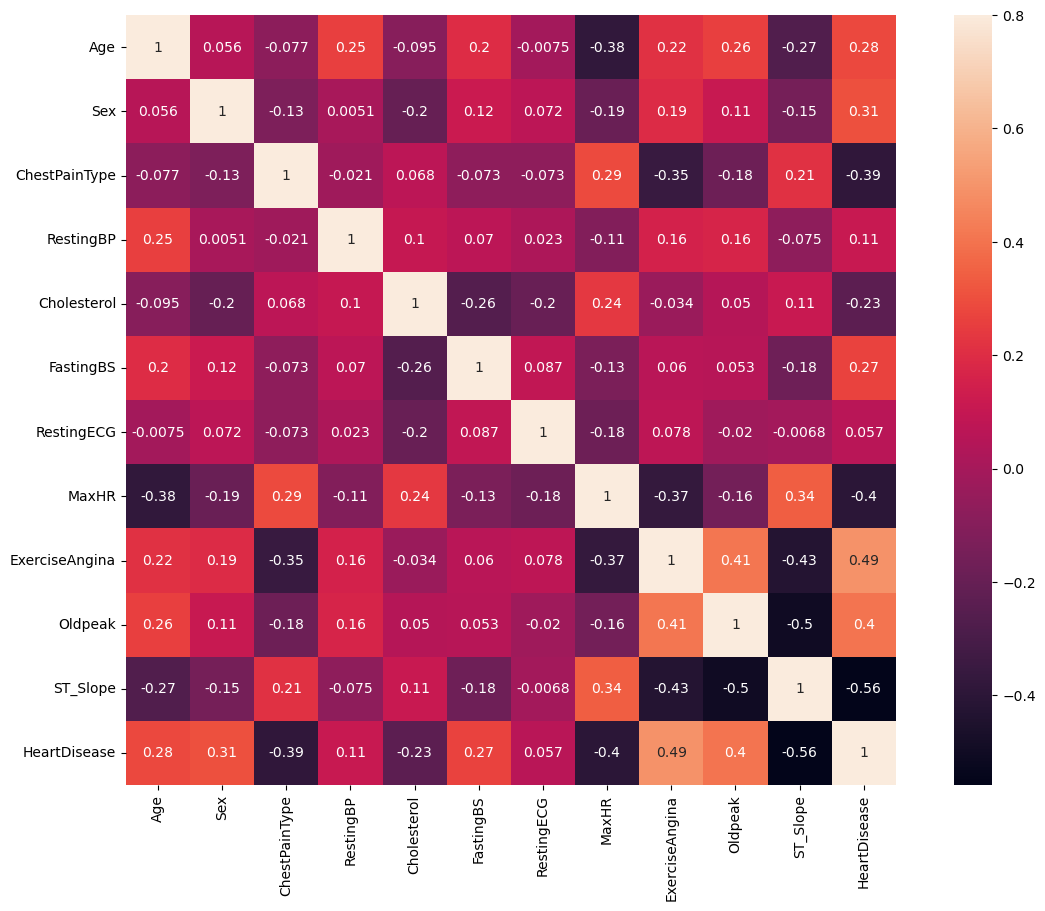

In [22]:
# Correlation between target and other features
plt.figure(figsize=(15,10))
sns.heatmap(df.corr(), vmax=0.8, square =True, annot=True);

There's a positive correlation of 0.49, 0.31, 0.4 between Excercise induced Angina, sex, old peak  and Heart disease - this suggests an associated risk of heart disease, whereas a negative correlation of -0.56, -0.4, -0.39 was also noted between St Slope, MaxHR, Chest Pain Type and Heart Disease and this suggests a small decrease in heart disease likelihood as max heart rate increases..

### Data Preprocessing

In [23]:
df.head(2)

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,1,1,140,289,0,1,172,0,0.0,2,0
1,49,0,2,160,180,0,1,156,0,1.0,1,1


In [25]:
# Creating a copy of the dataset excluding the object columns
df1 = df[["Age","Sex", "ChestPainType", "RestingBP", "Cholesterol", "FastingBS", "RestingECG", "MaxHR", 
          "ExerciseAngina", "Oldpeak", "ST_Slope", "HeartDisease"]]

label = df[['HeartDisease']]

In [26]:
# Dealing with outliers by normalization

scaler = MinMaxScaler()

df1["scaled_RBP"] = scaler.fit_transform(df1['RestingBP'].values.reshape(-1,1))
df1["scaled_chol"] = scaler.fit_transform(df1['Cholesterol'].values.reshape(-1,1))
df1["scaled_maxHR"] = scaler.fit_transform(df1['MaxHR'].values.reshape(-1,1))

df1.drop(["RestingBP","Cholesterol","MaxHR"], axis=1, inplace=True)

In [27]:
df1.head()

,Age,Sex,ChestPainType,FastingBS,RestingECG,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease,scaled_RBP,scaled_chol,scaled_maxHR
0,40,1,1,0,1,0,0.0,2,0,0.70,0.479270,0.788732
1,49,0,2,0,1,0,1.0,1,1,0.80,0.298507,0.676056
2,37,1,1,0,2,0,0.0,2,0,0.65,0.469320,0.267606
3,48,0,0,0,1,1,1.5,1,1,0.69,0.354892,0.338028
4,54,1,2,0,1,0,0.0,2,0,0.75,0.323383,0.436620


## Machine Learning

### Creating The Training and Testing Sets and Running the Models
The dataset is first divided into Train and Test data. The model is trained using the training set and evaluated using the testing set.

By splitting the data into training and testing sets, the model can be trained on one portion of the data and evaluated on another, helping to ensure that the model generalizes well to new data rather than just memorizing the training data. The use of random_state ensures reproducibility in processes such as splitting the dataset, shuffling, or random initialization. This approach is standard practice in machine learning workflows to ensure consistency in results and provide a reliable estimate of model performance.

The dataset, df, is split with 80% of the data assigned to the training set (train) and 20% assigned to the testing set (test). The test_size=0.2 parameter controls this division by specifying that 20% of the data should be reserved for testing.

The random_state=42 ensures that the split is consistent each time the code is run, which is useful for reproducibility. The training set is used to train the model, while the test set is used to evaluate how well the model performs on unseen data.

In [28]:
# Splitting the dataset into train and test

X_train, X_test, y_train, y_test = train_test_split(df1, label, test_size=0.2, random_state = 42)

In [29]:
X_train

,Age,Sex,ChestPainType,FastingBS,RestingECG,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease,scaled_RBP,scaled_chol,scaled_maxHR
1837,49,0,2,0,1,0,1.0,1,1,0.80,0.298507,0.676056
1703,69,1,3,1,0,0,0.1,1,0,0.80,0.388060,0.500000
957,48,0,0,0,1,1,1.0,1,0,0.75,0.376451,0.492958
1323,35,1,0,1,1,1,1.2,1,1,0.60,0.000000,0.492958
2962,28,1,1,0,0,0,0.0,2,0,0.65,0.218905,0.880282
...,...,...,...,...,...,...,...,...,...,...,...,...
3772,65,1,0,0,2,1,1.0,1,1,0.65,0.456053,0.387324
5191,61,1,2,0,1,1,1.3,1,1,0.70,0.470978,0.443662
5226,48,1,1,0,0,0,0.2,1,0,0.65,0.406302,0.845070
5390,43,1,2,0,1,0,1.9,2,0,0.65,0.522388,0.718310


In [30]:
# Model Building
# Logistic Regression

logreg = LogisticRegression()

logreg.fit(X_train, y_train)

ly_pred = logreg.predict(X_test)

print("LogisticRegression")
print("Accuracy:", accuracy_score(y_test, ly_pred))
print("Precision:", precision_score(y_test, ly_pred))
print("Recall:", recall_score(y_test, ly_pred))
print("F1-Score:", f1_score(y_test, ly_pred))
print("AUC-ROC:", roc_auc_score(y_test, ly_pred))

LogisticRegression
Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1-Score: 1.0
AUC-ROC: 1.0


The logistic regresson is 100% accurate and a precision of 100%.

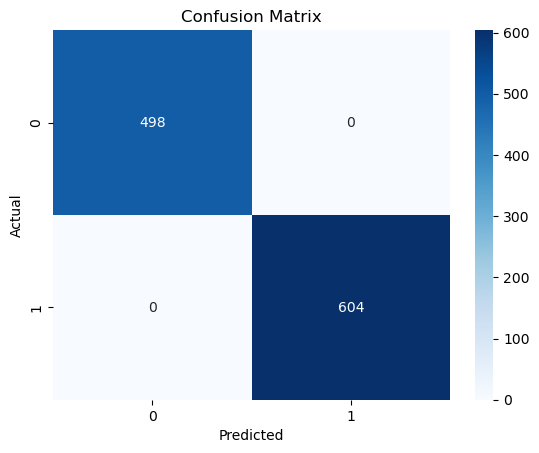

In [31]:
# Confusion matrix
lcm = confusion_matrix(y_test, ly_pred)

#Visualize the confusion matrix
sns.heatmap(lcm, annot=True, cmap="Blues", fmt="g")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

Confusion Matrix:
True Negatives (TN): 498 (correctly predicted as "No heart disease")

False Positives (FP): 0 (incorrectly predicted as "Heart disease" when they don’t have it)

True Positives (TP): 604 (correctly predicted as "Heart disease")

False Negatives (FN): 0 (correctly predicted as "No heart disease" when they actually have it)

This confusion matrix shows that the model has a perfect prediction essential for making informed decision regarding possibilities of a patient having heart disease or not.


In [32]:
# Model Building
# Random Forest Classifier

rfc = RandomForestClassifier()
rfc.fit(X_train, y_train)

rfy_pred = rfc.predict(X_test)

print("RandomForestClassifier")
print("Accuracy:", accuracy_score(y_test, rfy_pred))
print("Precision:", precision_score(y_test, rfy_pred))
print("Recall:", recall_score(y_test, rfy_pred))
print("F1-Score:", f1_score(y_test, rfy_pred))
print("AUC-ROC:", roc_auc_score(y_test, rfy_pred))

RandomForestClassifier
Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1-Score: 1.0
AUC-ROC: 1.0


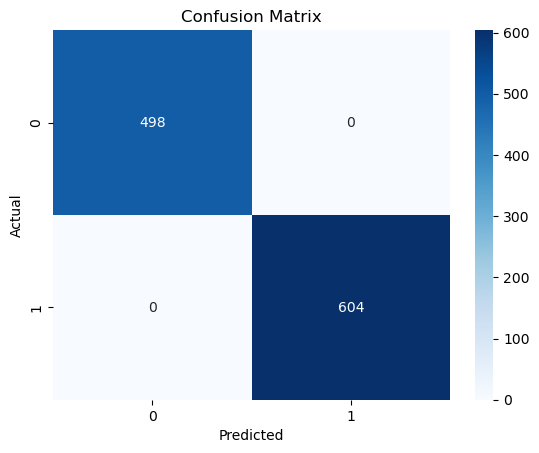

In [40]:
# Confusion matrix
rcm = confusion_matrix(y_test, rfy_pred)

#Visualize the confusion matrix
sns.heatmap(rcm, annot=True, cmap="Blues", fmt="g")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

Deciding to deploy further machine learning algorithms to determine their performances, 
the results are presented in the concluding paragraphs

In [41]:
# 8 Machine learning algorithm will be applied to the dataset
classifiers = [[XGBClassifier(), 'XGB Classifier'],
               [RandomForestClassifier(), 'Random Forest'],
               [KNeighborsClassifier(), 'k-Nearest Neighbours'],
               [SGDClassifier(), 'SGD Classifier'],
               [SVC(), 'SVC'],
               [GaussianNB(), 'Naive Bayes'],
               [DecisionTreeClassifier(random_state=42), 'Decision Tree'],
               [LogisticRegression(), 'Logistic Regression']
              ]

In [34]:
acc_list={}
precision_list={}
recall_list={}
roc_list={}

# for loop
for classifier in classifiers:
    model = classifier[0]
    model.fit(X_train, y_train)
    model_name = classifier[1]
   
    #test
    pred = model.predict(X_test)
    
    # Assessing
    a_score = accuracy_score(y_test, pred)
    p_score = precision_score(y_test, pred)
    r_score = recall_score(y_test, pred)
    roc_score = roc_auc_score(y_test, pred)
    
    #converting into percentages
    acc_list[model_name] = ([str(round(a_score*100, 2))+ '%'])
    precision_list[model_name] = ([str(round(p_score*100, 2))+ '%'])
    recall_list[model_name] = ([str(round(r_score*100, 2))+ '%'])
    roc_list[model_name] = ([str(round(roc_score*100, 2))+ '%'])
    
    if model_name != classifiers[-1][1]:
        print('')

In [35]:
print("Accuracy Score")
s1=pd.DataFrame(acc_list)
s1

Accuracy Score


,XGB Classifier,Random Forest,k-Nearest Neighbours,SGD Classifier,SVC,Naive Bayes,Decision Tree,Logistic Regression
0,100.0%,100.0%,98.91%,99.91%,96.91%,100.0%,100.0%,100.0%


In [36]:
print("Precision")
s2=pd.DataFrame(precision_list)
s2

Precision


,XGB Classifier,Random Forest,k-Nearest Neighbours,SGD Classifier,SVC,Naive Bayes,Decision Tree,Logistic Regression
0,100.0%,100.0%,99.33%,99.83%,96.27%,100.0%,100.0%,100.0%


Precision: 99.27% (For SVC) means that — When the model predicts "No heart disease," it is correct about 99.27% of the time.

In [43]:
print("Recall")
s3=pd.DataFrame(recall_list)
s3

Recall


,XGB Classifier,Random Forest,k-Nearest Neighbours,SGD Classifier,SVC,Naive Bayes,Decision Tree,Logistic Regression
0,100.0%,100.0%,98.68%,100.0%,98.18%,100.0%,100.0%,100.0%


Recall: 98.18% (For SVC Classifier) means that — The model correctly identifies 98.18% of patients who do not have heart disease.

In [42]:
print("ROC Score")
s4=pd.DataFrame(roc_list)
s4

ROC Score


,XGB Classifier,Random Forest,k-Nearest Neighbours,SGD Classifier,SVC,Naive Bayes,Decision Tree,Logistic Regression
0,100.0%,100.0%,98.94%,99.9%,96.78%,100.0%,100.0%,100.0%


F1-Score: Indicates the balance between precision and recall.

In this project, multiple machine learning models were evaluated to determine the most effective classifier based on four key 
metrics: Accuracy, Precision, Recall, and ROC Score. The results provide clear insights into the performance of each model

The XGBoost Classifier, Random Forest, Logistic Regression and Decision Tree consistently outperformed other models across all metrics, achieving perfect scores (100%) in Accuracy, Precision, Recall, and ROC Score. These models demonstrated accurate predictions, correctly identifying true positives, and distinguished between classes with high reliability, Even though other models didnt perform poorly.